In [1]:
import os
from matplotlib import rcParams
os.system('cp fonts/* '+os.path.join(rcParams['datapath']+'/fonts/ttf/'))

0

In [2]:
print rcParams

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.hold: None
axes.labelcolor: k
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


In [11]:
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
import numpy as np

#figsize 720pt, 10 inch

# Defaults
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"
rcParams['mathtext.default'] = 'regular'

# To use custom fonts in this way you have to copy them to rcParams['datapath']+/fonts/ttf/
rcParams['font.sans-serif'] = "HelveticaNeue" #Proprietary
#rcParams['font.sans-serif'] = "Comic Sans MS"

# To use Fira
# rcParams['font.sans-serif'] = "Fira Sans"

# Use Fira Math - (italic is not avaiable, dejavusans will be used by default)
rcParams['mathtext.fontset'] = "custom"
rcParams['mathtext.rm'] = "Fira Math"
rcParams['mathtext.bf'] = "Fira Math:medium"
rcParams['mathtext.sf'] = "Fira Math"
#rcParams['mathtext.it'] = "Fira Math:italic" # Broken
rcParams['mathtext.tt'] = "Fira Mono"

# To render with TeX use the following 
# Needs to install tex-live to have helvetica and use tex to render labels
# rcParams['text.latex.preamble'] = [
#        r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
#        r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
#        r'\usepackage{helvet}',    # set the normal font here
#        r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
#        r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
# ]  
# rc('text', usetex=True)

rcParams['figure.figsize'] = (10.0, 10.0)
_fsize = rcParams.get('figure.figsize')[1]
font_size = _fsize*72/30
print font_size
rcParams['font.size'] = font_size  # Legend title for example
rcParams['axes.labelsize'] = font_size 
rcParams['xtick.labelsize'] = font_size * 0.9 
rcParams['ytick.labelsize'] = font_size * 0.9
rcParams['legend.fontsize'] = font_size * 0.9
rcParams['legend.handlelength'] = 1.5


rcParams['xtick.direction'] = 'in'
rcParams['xtick.major.size'] =  12
rcParams['xtick.minor.size'] = 6.0
rcParams['xtick.minor.top'] =  True
rcParams['xtick.minor.bottom'] =  True
rcParams['xtick.minor.visible'] =  True
rcParams['ytick.direction'] = 'in'
rcParams['ytick.major.size'] =  12
rcParams['ytick.minor.size'] = 6.0
rcParams['ytick.minor.left'] =  True
rcParams['ytick.minor.right'] =  True
rcParams['ytick.minor.visible'] =  True
rcParams['xtick.major.pad'] = 6

rc('axes', linewidth=2)

24.0


In [12]:
# Use seaborn color palette
#import seaborn as sns
#p = sns.color_palette("Paired")
#p = sns.color_palette("muted")
#sns.set_palette(p)
C = ['darkorange', 'steelblue', 'firebrick', 'purple']
from matplotlib import font_manager as fm, rcParams

In [13]:
def annot(ax, paper=False, supplementary=False, data=False, year=2017, lumi=None, llabel=None, rlabel=None):
    # CMS label    
    cms = ax.annotate('CMS', xy=(0.001, 1.015), xycoords='axes fraction', fontsize=font_size*1.3, fontname='Arial',
                ha='left', fontweight='bold', annotation_clip=False)
    
    # Right label
    if rlabel != None:
        _lumi = rlabel
    else:
        if lumi != None:
            _lumi = r'{lumi}, {year} (13 TeV)'.format(lumi=str(lumi)+' $\mathrm{fb^{-1}}$', year=str(year))
        else: 
            _lumi = '{} (13 TeV)'.format(str(year))

    ax.annotate(_lumi, xy=(1, 1.015), xycoords='axes fraction', fontsize=font_size, fontweight='normal',
            ha='right', annotation_clip=False)
    
    # Left label 
    if llabel != None:
        _label = llabel
    else:
        _label = ""
        if not data:
            _label = " ".join(["Simulation", _label])
        if not paper:
            _label = " ".join([_label, "Preliminary"])
        if supplementary:
            _label = " ".join([_label, "Supplementary"])    
        
        _label = " ".join(_label.split())            
    
    ax.annotate(_label, xy=(0.001, 1.015), xycoords='axes fraction', fontsize=font_size, 
                xytext=(cms.get_window_extent(renderer=f.canvas.get_renderer()).width, 0), textcoords='offset points',
                fontstyle='italic', ha='left', annotation_clip=False)
    return ax
    

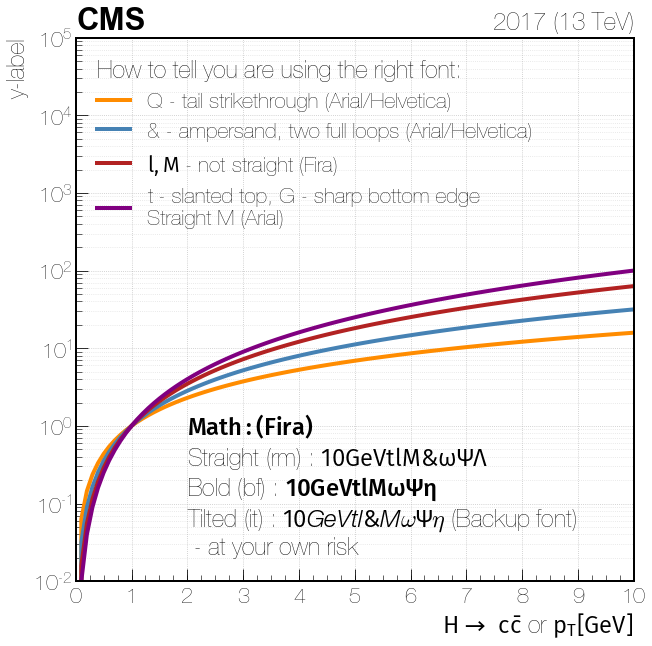

In [15]:
f, ax = plt.subplots()

x = np.linspace(0,10,101)
y0 = x**(1.2)
y1 = x**(1.5)
y2 = x**(1.8)
y3 = x**(2)

ax.plot(x, y0, lw=4, label="Q - tail strikethrough (Arial/Helvetica) ", c=C[0])
ax.plot(x, y1, lw=4, label="& - ampersand, two full loops (Arial/Helvetica)", c=C[1])
ax.plot(x, y2, lw=4, label="$\mathrm{l, M}$ - not straight (Fira)", c=C[2])
ax.plot(x, y3, lw=4, label="t - slanted top, G - sharp bottom edge \nStraight M (Arial)", c=C[3])

ax.set_xlim(0,10)
ax.set_ylim(0.01,100000)
ax.set_xlabel(r'$\mathrm{H \rightarrow\ c\bar{c}}$ or $\mathrm{p_T [GeV]}$', ha='right', x=1.0)
ax.set_ylabel('y-label', ha='right', y=1.0)

# Legend
leg = ax.legend(borderpad=0.5, frameon=False, loc=2)
leg.set_title(
          'How to tell you are using the right font:'
)
leg._legend_box.align = "left" # Align legend title

####################### ROOT-like CMS ticks and labels ##############################
# Sets 10 major ticks and 5 minor between each major, calling ax.semilogy() overwrites this.
import matplotlib.ticker as plticker
xl = ax.get_xlim()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=(xl[-1]-xl[0])/10))
ax.xaxis.set_minor_locator(plticker.MultipleLocator(base=(xl[-1]-xl[0])/40))
yl = ax.get_ylim()
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=(yl[-1]-yl[0])/10))
ax.yaxis.set_minor_locator(plticker.MultipleLocator(base=(yl[-1]-yl[0])/40))
    
ax.grid(which='minor', alpha=0.4, axis='y', linestyle='dotted')
ax.grid(which='major', alpha=0.8, linestyle='dotted')
math_desc =  "$\mathbf{Math: (Fira)}$" \
          + "\nStraight (rm) : $\mathrm{10GeVtlM&\omega\Psi\Lambda}$" \
          + "\nBold (bf) : $\mathbf{10GeVtlM\omega\Psi\eta}$" \
          + "\nTilted (it) : $\mathit{10GeVtl&M\omega\Psi\eta}$ (Backup font)\n - at your own risk" 
ax.annotate(math_desc, xy=(0.2, 0.05), xycoords='axes fraction', fontsize=font_size, fontweight='normal',
             ha='left', annotation_clip=False)

#ax = annot(ax, data=True, lumi=2.5)
ax = annot(ax, llabel="")
##########################################################################

ax.semilogy()
f.show()


In [ ]:
import matplotlib
matplotlib.get_configdir()